# U.S. Medical Insurance Costs

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about patient information in the file and gain insight into potential use cases for the dataset.

To start, all necessary libraries must be imported. For this project, the only library needed is the `csv` library in order to work with the **insurance.csv** data. There are other potential libraries that could help with this project, however, for this analysis, using just `csv` library will suffice. 

In [1]:
# import csv library
import csv


The next step is to look through **insurance.csv** in order to get aquanted with the data. The following aspects of the data file will be checked in order to plan out how to import the data into a Python file:
* The names of columns and rows
* Any noticeable missing data
* Types of values (numerical vs. categorical)

<br>

**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

There are no signs of missing data. To store this information, seven empty lists will be created to hold each individual column of data from **insurance.csv**.

In [2]:
# Create empty lists for each columns in insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []


# load csv data
with open('insurance.csv', "r") as insurance_csv:
    # read data and put into a dictionary
    insurance_dict = csv.DictReader(insurance_csv, delimiter=',')
    # loop through the data in each row of the csb
    for row in insurance_dict:
        # add the data from each row to it's respective list
        ages.append(row['age'])
        sexes.append(row['sex'])
        bmis.append(row['bmi'])
        num_children.append(row['children'])
        smoker_statuses.append(row['smoker'])
        regions.append(row['region'])
        insurance_charges.append(row['charges'])
        #print(row) # Each row is a dictionary        
        

Now that all the data from **insurance.csv** neatly organized into labeled lists, the analysis can be started. This is where I plan out what to investigate and how to perform the analysis. There are many aspects of the data that could be looked into. The following operations will be implemented:
* find average age of the patients
* return the number of males vs. females counted in the dataset
* find geographical location of the patients
* return the average yearly medical charges of the patients
* find the different costs between smokers and non-smokers
* find average age for someone who has at least one child in the dataset
* creating a dictionary that contains all patient information

*Note that numerical data in the lists we created earlier are in string mode. In order to perform our calcualtions, they would need to be converted to intergers or floats (decimals) in our Python code.* 

In [3]:
# Calculate the average age of the patients in the dataset.
def avg_ages():
    total_age = 0
    for string_age in ages:
        # convert each age from string to a intger and add it to the total
        total_age += int(string_age)
        # return total age divided by the number of items in the ages list
    return (f"Average Patient Age: {round(total_age / len(ages), 2)} years.")
    
avg_ages() # call the function to see the average paitent age


'Average Patient Age: 39.21 years.'

The average age of the patients in **insurance.csv** is about 39 years old.

In [4]:
# Count the number of males and females in the dataset.

print(f"Total number of female patients: {sexes.count('female')}.")
print(f"Total number of male patients: {sexes.count('male')}.")


Total number of female patients: 662.
Total number of male patients: 676.


The number of males and females in **insurance.csv** are almost equal. Hence, the dataset is representative of a borader population of individuals. 

In [5]:
# find all the unique geographical location of the patients

def unique_regions():
    # find all unique region and put them in a list
    unique_regions = [] 
    for region in regions:
        if region not in unique_regions:
            # if the region is not in list, then add it
            unique_regions.append(region)
    print(unique_regions)
    # Count the number of patients from each region
    for region in unique_regions:
        print(f"Total number of patients from {region} region: {regions.count(region)}.")
            
unique_regions() # call the function to see each unique region patients are from


['southwest', 'southeast', 'northwest', 'northeast']
Total number of patients from southwest region: 325.
Total number of patients from southeast region: 364.
Total number of patients from northwest region: 325.
Total number of patients from northeast region: 324.


There are four unique geographical regions in this dataset, and it is important to note that all patients come from the United States. Majority of the patients come from the southeast region in the amount of 364 patients.

In [6]:
# Calculate the average yearly medical charges of the patients

def avg_insurance_charges():
    total_charges = 0
    for string_charge in insurance_charges:
        # convert each charge from string to a float and add it to the total
        total_charges += float(string_charge)
        # return total charges divided by the number of items in the insurance_charges list
    return (f"Average Yearly Medical Insurance Charges: ${round(total_charges / len(insurance_charges), 2)}")
    
avg_insurance_charges() # call the function to see the average yearly medical charges


'Average Yearly Medical Insurance Charges: $13270.42'

The average yearly medical insurance charge per individual is $13,270 US dollars.

In [10]:
# What are the average costs of smokers vs. non-smokers.

def Avg_smoker_non_smoker_cost():
    # Create empty list for both smokers and non-smokers.
    smoker_charges = []
    non_smoker_charges = []
    
    # Create index tracker for both smoker and non-smokers.
    # Index tracker will keep track of where to start the search for a 'yes' or 'no'
    # smoker status.
    smoker_index_start = 0 
    non_smoker_index_start = 0 
    
    for smoker_status in smoker_statuses:    
        if smoker_status == "yes":
            # If smoker status is "yes" then add the patient charge to smoker_charges list.
            # Use index() with Start and End Parameters 
            smoker_index = smoker_statuses.index('yes', smoker_index_start, len(smoker_statuses))
            #Add plus one to the smoker_index_start so the search for 'yes' next time 
            # will start on the next index because we don't want to double count the previous
            # index.
            smoker_index_start = smoker_index + 1
            # Turn the chrage from a string to float then add it to list.
            smoker_charges.append(float(insurance_charges[smoker_index]))
        elif smoker_status == "no":
            # If smoker status is 'no' then add the patient charge to non_smoker_charges list.
            # The remaining code has the same logic as the smoker.
            non_smoker_index = smoker_statuses.index('no', non_smoker_index_start, len(smoker_statuses))
            non_smoker_index_start = non_smoker_index + 1
            non_smoker_charges.append(float(insurance_charges[non_smoker_index]))
    # calculate average for both smokers and non-smokers chages
    avg_smoker_charges = round(sum(smoker_charges) / len(smoker_charges), 2)
    avg_non_smoker_charges = round(sum(non_smoker_charges) / len(non_smoker_charges), 2)
    print(f"The average medical cost for a smokers: {avg_smoker_charges}.")
    print(f"The average medical cost for a non-smokers: {avg_non_smoker_charges}.")
    print(f"The average medical cost for a smoker is {avg_smoker_charges - avg_non_smoker_charges} more than a non-smoker.")

    
Avg_smoker_non_smoker_cost() # Call the function


The average medical cost for a smokers: 32050.23.
The average medical cost for a non-smokers: 8434.27.
The average medical cost for a smoker is 23615.96 more than a non-smoker.


The average medical cost for a smoker is $23,616 higher than a non-smoker. It's cheaper and healther to not smoke!

In [8]:
# What is the average age for someone who has at least one child in the dataset?

def avg_age_one_or_more_child():
    age_patients = []
    age_index_start = 0 # create age index tracker
    for children in num_children:    
        if int(children) >= 1:
            # If patient has one or more child then add age to age_patients list.
            age_index = num_children.index(children, age_index_start)
            age_index_start = age_index + 1 # add one to the age index tracker to avoid double count
            age_patients.append(int(ages[age_index]))
    avg_age = round(sum(age_patients) / len(age_patients), 2)
    print(f"The average age for someone who has at least one child: {avg_age}.")

avg_age_one_or_more_child()


The average age for someone who has at least one child: 39.78.


In [9]:
# Created a dictionary that contains all patient information

def create_patient_dict():
    patient_dict = {}
    patient_dict["age"] = [int(age) for age in ages]
    patient_dict["sexe"] = sexes
    patient_dict["bmi"] = [float(bmi) for bmi in bmis]
    patient_dict["children"] = [int(children) for children in num_children]
    patient_dict["smoker"] = smoker_statuses
    patient_dict["region"] = regions
    patient_dict["charges"] = [float(insurance_charge) for insurance_charge in insurance_charges]
    return patient_dict

# create_patient_dict() # Un-comment this function to call it. 


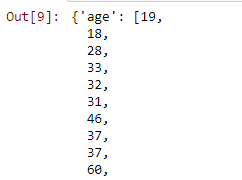

All patient data is now neatly organized in **one** dictionary. This is convenient for further analysis if a decision is made to continue making investigations for the attributes in **insurance.csv**. 

The amove image shows a sample of how the dictionary would look like if the *create_patient_dict()* function is called. If I actually called the function, then it will show all the data and we would end up needing to scrolling down a long way to the end of this page.

*Note that when we first read and opened the `csv` file at the beginning of this project, each row was a dictionary. In the code above, the dictionary consists of only one row.*
